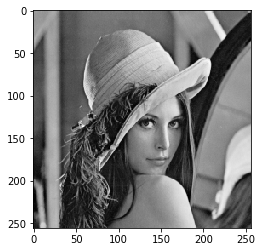

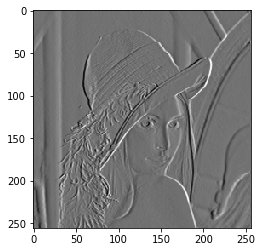

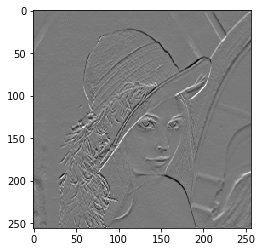

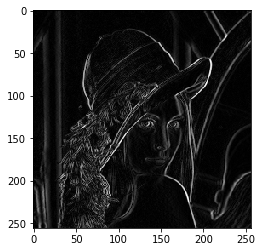

H :  (array([14444,  4078, 10625,  5140,     0,     0,     0,     0,     0], dtype=int64), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))


In [36]:

   #  row =  sub_Block[nr of block][nr row, nr of col]   
#     print sub_Block[0,2]
    
#     print sub_Block[15][0,2]
#     sub_Block[15][0,1]
#     sub_Block[15][0,3]


import numpy as np
import scipy
from scipy.misc import imread, imsave, imresize
import skimage
from skimage import data
from matplotlib import pyplot as plt
from skimage.util.shape import view_as_blocks
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import feature
from skimage.transform import warp, AffineTransform
from skimage import io
%matplotlib inline
from PIL import Image


#************************************Function SECTION************************************   
def SUB_B(image, (M,N)):
 
    sub_Block = view_as_blocks(image, block_shape=(M,N))

    return sub_Block

 
#************************************Function SECTION************************************   


def myGrad_X(sub_Block,(max_row,max_col)):
    
    grad_sub_Block=np.empty([max_col,max_row]) 
    
    for row in range(0,max_row):
        for col in range(1,max_col-1):
                grad_sub_Block[row,col]=sub_Block[row,col-1]-sub_Block[row,col+1]  
   
        grad_sub_Block[row,0]= sub_Block[row,1]-sub_Block[row,0]
        grad_sub_Block[row,max_col-1]= sub_Block[row,max_col-1]-sub_Block[row,max_col-2]            
    return  grad_sub_Block   
# *********************************************************************************
def myGrad_Y(sub_Block,(max_row,max_col)):
    
#     print sub_Block[2,0]
    grad_sub_Block=np.empty([max_col,max_row]) 
    
    
    for col in range(0,max_col):
        for row in range(1,max_row-1):
            grad_sub_Block[col,row]=(sub_Block[row-1,col]-sub_Block[row+1,col])/2.0   
    
        grad_sub_Block[col,0]= sub_Block[1,col]-sub_Block[0,col]
        grad_sub_Block[col,max_row-1]= sub_Block[max_row-1,col]-sub_Block[max_row-2,col]
    return  grad_sub_Block   

# *********************************************************************************

def Concat_images(img_block,width,Height):
    return np.reshape(img_block,(width,Height))
# *********************************************************************************
def Preprocess(img):

    img =imread(img)
    
    
    img_gray=skimage.color.rgb2gray(img)
    
    resized_img=skimage.transform.resize(img_gray,(256,256))
    
    plt.imshow(resized_img, cmap='gray')
    plt.show()
    return resized_img
# *********************************************************************************
def magnitude(iGx,iGy):

    iGx2 = np.power(iGx,2)
    iGy2 =  np.power(iGy,2)
    
    m= np.sqrt(np.add(iGx2,iGy2))
    
     
    return m

# *********************************************************************************
def merge(mag_img,deg):
     
    m = np.empty(mag_img.shape,dtype=object)
    for i in range (0,mag_img.shape[0]): 
        for j in range (0, mag_img.shape[1]):
            m[i,j]= (mag_img[i,j] , deg[i,j])
#     print m
    
    return m

# *********************************************************************************

def Proc_Block(Sub_Blocks_Theta,Sub_Blocks_deg):

    
    Theta_cells=SUB_B(Sub_Blocks_Theta, (8,8))

    Mag_cells=SUB_B(Sub_Blocks_deg, (8,8))
    
    for i in range(len(Theta_cells)):
        for j in  range(len(Theta_cells)):
            ComputeCellHistogram(Theta_cells[i,j],Mag_cells[i,j])
            

    return 


# *********************************************************************************

def ComputeCellHistogram(Theta_cells,Mag_cells):
    
    pass

    return 






#************************************TEST SECTION************************************         


# image='beach.jpg'
image='lenna.png'


# sub_Block=Test(image, (16,16))

preProc_img=Preprocess(image)
    
row_index=16
col_index=16
plot_nr=1



# plt.figure(figsize=(30,30))
# for i in range(16):
#     for j in range(16):
imGx=myGrad_X(preProc_img, (256,256))
#         sub_Blocks[i,j]=imGx       

# concatinated_image=Concat_images(sub_Blocks,256,256)

plt.imshow(imGx, cmap='gray')
plt.show()
        
        
        
#         plt.subplot(row_index, col_index, plot_nr)
#         plot_nr= plot_nr + 1
#         plt.imshow(imGx, cmap='gray')
# plt.show()





    
    
    
# row_index=16
# col_index=16
# plot_nr=1

# print '************************************************************************************************'


# plt.figure(figsize=(30,30))
# for i in range(16):
#     for j in range(16):

imGy=myGrad_Y(preProc_img, (256,256))


# #         plt.subplot(row_index, col_index, plot_nr)
# #         plot_nr= plot_nr + 1
# #         plt.imshow(imGy, cmap='gray')
# # plt.show()

imGy=np.transpose(imGy)


plt.imshow(imGy, cmap='gray')
plt.show()


mag_img=magnitude(imGx,imGy)
plt.imshow(mag_img, cmap='gray')
plt.show()
        
#  y-coordinates. y ,x-coordinates. x

Theta =np.arctan2(imGy,imGx)     
deg = np.rad2deg(Theta)    
# print deg


# Mag_deg= merge(mag_img,deg)

Sub_Blocks_Theta=SUB_B(Theta, (16,16))
Sub_Blocks_deg  =SUB_B(deg, (16,16))
# # print Sub_Blocks , Sub_Blocks.shape


for i in range(len(Sub_Blocks_Theta)):
    for j in range(len(Sub_Blocks_Theta)):
         Mag_deg_cells=Proc_Block(Sub_Blocks_Theta[i,j],Sub_Blocks_deg[i,j])
        

H=np.histogram(Theta , bins=[0, 1, 2, 3,4,5,6,7,8,9])

print 'H : ', H


# H=ComputeCellHistogram(Theta)


# np.histogram([1, 2, 1], bins=[0, 1, 2, 3])      


    

